In [13]:
import Pkg
Pkg.activate("../../FinancialPlanner")

  Activating project at `c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner`


In [14]:
using DataFrames, TimeSeries, XLSX
using StatsBase
using Plots


In [15]:
df = DataFrame(XLSX.readtable("../data/usa_data.xlsx", "Data", infer_eltypes=true))
data_source = collapse(TimeArray(df; timestamp = :Date), Dates.quarter, first)

div_growth = percentchange(data_source[:Dividend])

dy = data_source[:Dividend] ./ data_source[:Stock_Price]

sr = from(data_source[:T_Bill], Date(1971, 12, 31))

initial_div_growth = to(div_growth, Date(1971, 12, 31)) 

div_growth = from(div_growth, Date(1971, 12, 31))

dy = from(dy, Date(1971, 12, 31))

211×1 TimeArray{Float64, 1, Date, Vector{Float64}} 1972-01-01 to 2024-07-01
┌────────────┬──────────────────────┐
│            │ Dividend_Stock_Price │
├────────────┼──────────────────────┤
│ 1972-01-01 │            0.0295363 │
│ 1972-04-01 │             0.028513 │
│ 1972-07-01 │            0.0286495 │
│ 1972-10-01 │            0.0280218 │
│ 1973-01-01 │             0.027263 │
│ 1973-04-01 │            0.0299461 │
│ 1973-07-01 │            0.0300622 │
│ 1973-10-01 │            0.0308739 │
│     ⋮      │          ⋮           │
│ 2023-01-01 │            0.0166266 │
│ 2023-04-01 │            0.0164393 │
│ 2023-07-01 │            0.0150605 │
│ 2023-10-01 │             0.016685 │
│ 2024-01-01 │            0.0145803 │
│ 2024-04-01 │            0.0142169 │
│ 2024-07-01 │            0.0130337 │
└────────────┴──────────────────────┘
                     196 rows omitted

In [16]:
display(mean(div_growth) .* 4)
display(std(div_growth) .* 4^.5)

1×1 TimeArray{Float64, 1, Date, Vector{Float64}} 2024-07-01 to 2024-07-01
┌────────────┬───────────┐
│            │ Dividend  │
├────────────┼───────────┤
│ 2024-07-01 │ 0.0607349 │
└────────────┴───────────┘

1×1 TimeArray{Float64, 1, Date, Vector{Float64}} 2024-07-01 to 2024-07-01
┌────────────┬───────────┐
│            │ Dividend  │
├────────────┼───────────┤
│ 2024-07-01 │ 0.0323835 │
└────────────┴───────────┘

In [17]:
v = .03

T = length(div_growth)
exp_div_growth = zeros(T + 1)

exp_div_growth[1] = values(mean(initial_div_growth))[1] 

for t in 2:T+1
    exp_div_growth[t] = v * values(div_growth)[t-1] + (1 - v) * exp_div_growth[t-1]
end

exp_div_growth = TimeArray(timestamp(div_growth), exp_div_growth[2:end]) .* 4

211×1 TimeArray{Float64, 1, Date, Vector{Float64}} 1972-01-01 to 2024-07-01
┌────────────┬───────────┐
│            │ A         │
├────────────┼───────────┤
│ 1972-01-01 │ 0.0380218 │
│ 1972-04-01 │ 0.0368811 │
│ 1972-07-01 │ 0.0360354 │
│ 1972-10-01 │ 0.0369045 │
│ 1973-01-01 │ 0.0372044 │
│ 1973-04-01 │ 0.0376056 │
│ 1973-07-01 │ 0.0383505 │
│ 1973-10-01 │ 0.0405197 │
│     ⋮      │     ⋮     │
│ 2023-01-01 │ 0.0674838 │
│ 2023-04-01 │ 0.0668107 │
│ 2023-07-01 │ 0.0658021 │
│ 2023-10-01 │ 0.0653238 │
│ 2024-01-01 │ 0.0645261 │
│ 2024-04-01 │ 0.0641886 │
│ 2024-07-01 │ 0.0629061 │
└────────────┴───────────┘
          196 rows omitted

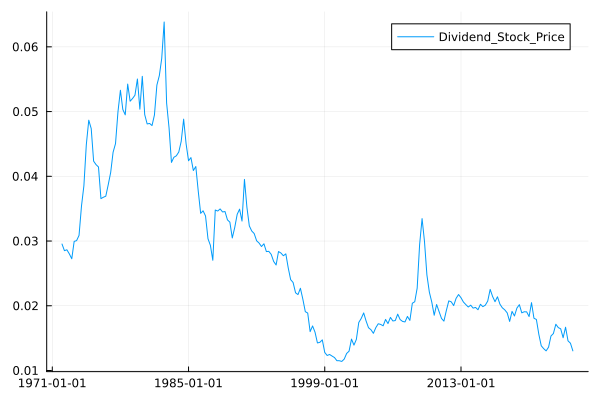

In [18]:
plot(dy)

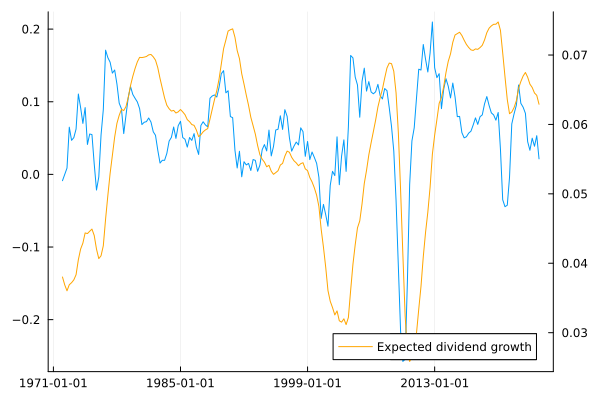

In [19]:
plot(div_growth .* 4; label="Dividend growth")
plot!(twinx(), exp_div_growth;label="Expected dividend growth", color= "orange")

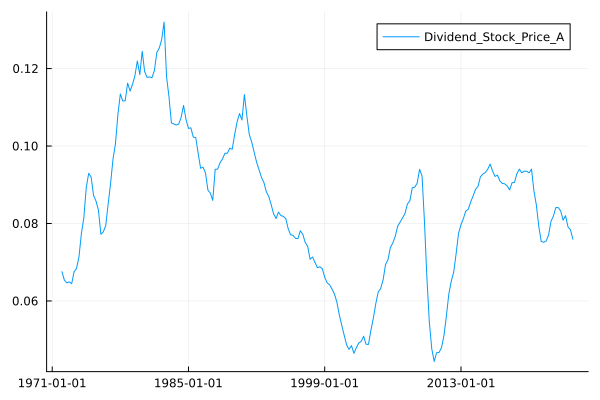

In [20]:
expected_equity_return = dy .+ exp_div_growth 
plot(expected_equity_return)

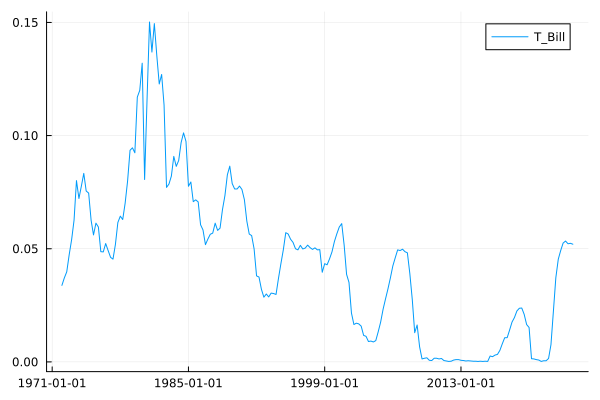

In [21]:
plot(sr)

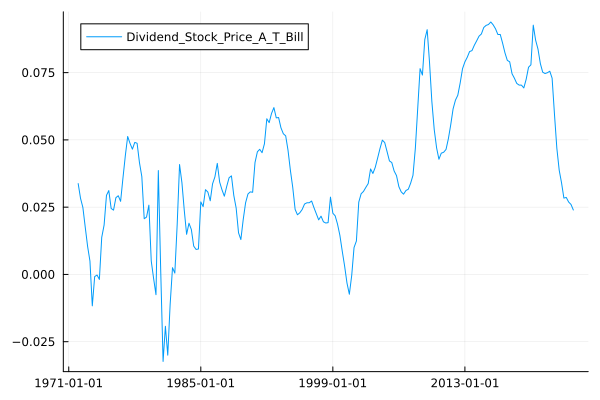

In [22]:
equity_premium = dy .+ exp_div_growth .- sr
plot(equity_premium)

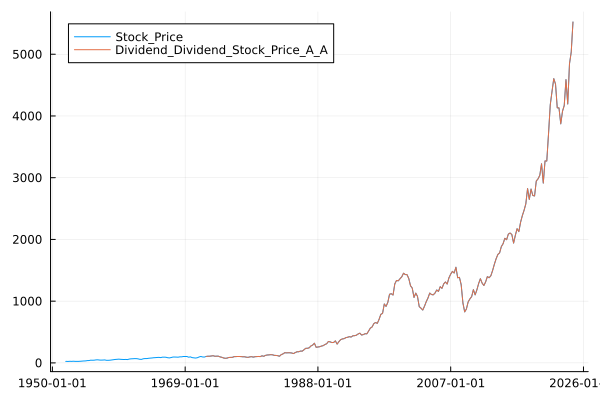

In [23]:
est_prices = data_source[:Dividend] ./ (expected_equity_return .- exp_div_growth)

plot(data_source[:Stock_Price])
plot!(est_prices)